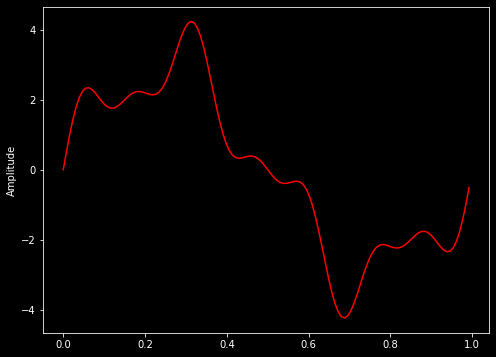

[ 8.+0.00000000e+00j -8.-9.79717439e-16j]
[16.+0.00000000e+00j -8.-1.46957616e-15j]
[24.+0.00000000e+00j -8.+8.00000000e+00j -8.-1.95943488e-15j
 -8.-8.00000000e+00j]
[12.+0.0000000e+00j -8.-1.2246468e-15j]
[20.+0.00000000e+00j -8.-1.71450552e-15j]
[32.+0.0000000e+00j -8.+8.0000000e+00j -8.-2.4492936e-15j
 -8.-8.0000000e+00j]
[56.+0.00000000e+00j -8.+1.93137085e+01j -8.+8.00000000e+00j
 -8.+3.31370850e+00j -8.-3.91886976e-15j -8.-3.31370850e+00j
 -8.-8.00000000e+00j -8.-1.93137085e+01j]
[10.+0.00000000e+00j -8.-1.10218212e-15j]
[18.+0.00000000e+00j -8.-1.59204084e-15j]
[28.+0.00000000e+00j -8.+8.00000000e+00j -8.-2.20436424e-15j
 -8.-8.00000000e+00j]
[14.+0.00000000e+00j -8.-1.34711148e-15j]
[22.+0.0000000e+00j -8.-1.8369702e-15j]
[36.+0.00000000e+00j -8.+8.00000000e+00j -8.-2.69422296e-15j
 -8.-8.00000000e+00j]
[64.+0.00000000e+00j -8.+1.93137085e+01j -8.+8.00000000e+00j
 -8.+3.31370850e+00j -8.-4.40872848e-15j -8.-3.31370850e+00j
 -8.-8.00000000e+00j -8.-1.93137085e+01j]
[120.+0.0000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


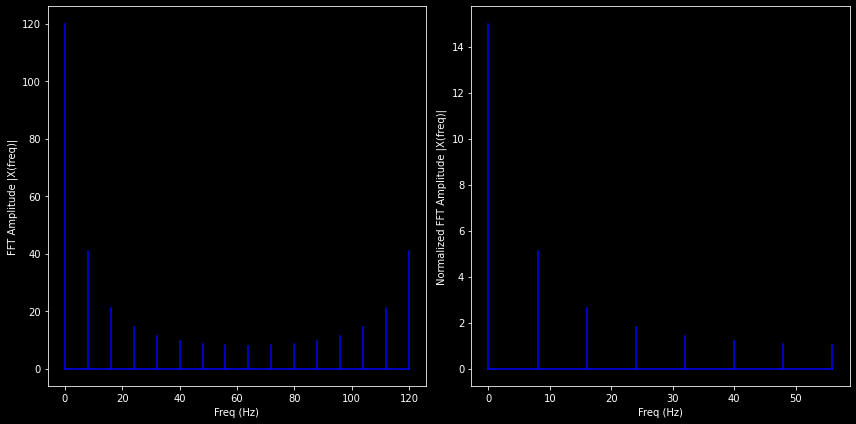

In [3]:
import mysignals as sigs
from matplotlib import pyplot as plt
from scipy.fftpack import fft,ifft
import numpy as np
from matplotlib import style

#1
freq_domain_signal = fft(sigs.ecg_signal)
time_domain_signal = ifft(freq_domain_signal)
magnitude = np.abs(freq_domain_signal)

style.use('dark_background')
plt.rcParams["figure.figsize"] = (20,10)

#f,plt_arr= plt.subplots(4,sharex=True)
#f.suptitle("Fast Fourier Transform (FFT)")

#plt_arr[0].plot(sigs.ecg_signal,color='red')
#plt_arr[0].set_title("Time Domain (Input Signal)", color ='red')
#plt_arr[1].plot(freq_domain_signal,color='cyan')
#plt_arr[1].set_title("Frequency Domain (FFT)", color ='cyan')
#plt_arr[2].plot(magnitude,color='cyan')
#plt_arr[2].set_title("Magnitude", color ='cyan')
#plt_arr[3].plot(time_domain_signal,color='green')
#plt_arr[3].set_title("Time Domain (IFFT)", color ='green')

#plt.show()

#2
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)

        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        
        print(X)
        return X


# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

X = FFT([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print("----")
print(X)
#X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

